In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def pdf(x):
    return 2*x

def cdf(x):
    return x**2

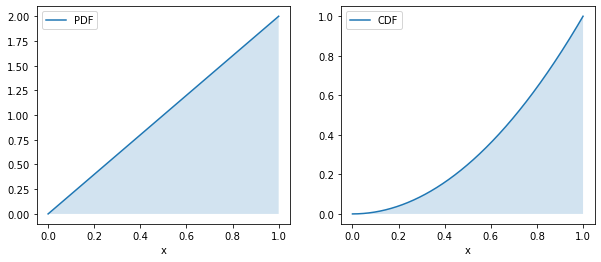

In [3]:
xs = np.linspace(0, 1, 1000)
ps = pdf(xs)
cdfs = cdf(xs)

fig, axes = plt.subplots(figsize=(10,4), ncols=2)
axes[0].plot(xs, ps, label="PDF") 
axes[0].fill_between(xs, ps, 0, alpha=0.2)

axes[1].plot(xs, cdfs, label="CDF") 
axes[1].fill_between(xs, cdfs, 0, alpha=0.2)

axes[0].set_xlabel("x"), axes[1].set_xlabel("x")
axes[0].legend(), axes[1].legend();

In [4]:
def inverse_cdf(cdf):
    return np.sqrt(cdf)

def sample(n=1):
    u = np.random.random(size=n)
    return inverse_cdf(u)

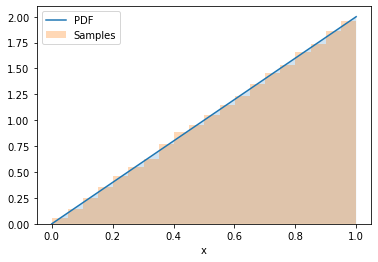

In [5]:
samples = sample(n=100000)

plt.plot(xs, ps, label="PDF") 
plt.fill_between(xs, ps, 0, alpha=0.2)
plt.hist(samples, bins=20, density=True, alpha=0.3, label="Samples")
plt.legend(), plt.xlabel("x");

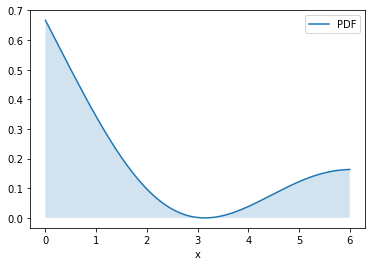

In [6]:
xs = np.linspace(0, 6, 1000)
pdfs = ((1 + np.cos(xs)) / (1.5 * xs + 3))

plt.plot(xs, pdfs, label="PDF")
plt.fill_between(xs, pdfs, 0, alpha=0.2)
plt.xlabel("x"), plt.legend();

In [7]:
from scipy.interpolate import interp1d
from scipy.integrate import cumtrapz

In [8]:
def get_inverted_cdf(xs, pdfs):
    cdfs = cumtrapz(pdfs, x=xs)
    cdfs = cdfs / cdfs.max()
    cdfs = np.insert(cdfs, 0, 0)
    return interp1d(cdfs, xs, kind='linear', fill_value='extrapolate')

def sample_fn(fn, n=1):
    return fn(np.random.random(size=n))

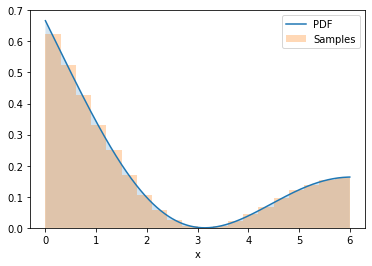

In [9]:
fn = get_inverted_cdf(xs, pdfs)
samples_2 = sample_fn(fn, n=100000)

plt.plot(xs, pdfs, label="PDF")
plt.fill_between(xs, pdfs, 0, alpha=0.2)
plt.hist(samples_2, bins=20, density=True, alpha=0.3, label="Samples")
plt.legend(), plt.xlabel("x");